In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
fashiondata=keras.datasets.fashion_mnist

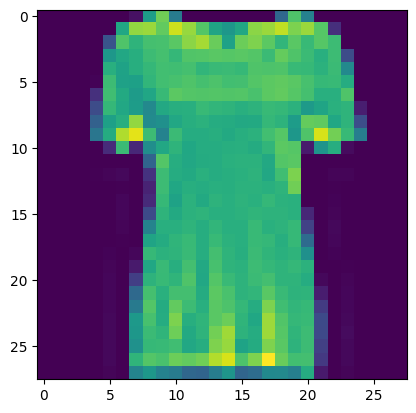

In [7]:
(train_image,train_label),(test_image,test_label)=fashiondata.load_data()
plt.imshow(train_image[10])

In [8]:
train_image=train_image/255
test_image=test_image/255

In [9]:
model= tf.keras.Sequential([
                            tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D(32,(3,3),strides=(2, 2),padding='same'),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D(32,(3,3),strides=(2, 2),padding='same'),
                            tf.keras.layers.BatchNormalization(),

                            #tf.keras.layers.Conv2D(32,(3,3)),
                            #tf.keras.layers.BatchNormalization(),
                          
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')
])

print(model.summary())
model.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )
model.fit(train_image,train_label,epochs=5)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 32)         1

E:\anaconda3\envs\hell\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 18s 5ms/step - loss: 0.4313 - accuracy: 0.8460
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3168 - accuracy: 0.8828
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2751 - accuracy: 0.8981
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2426 - accuracy: 0.9098
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2111 - accuracy: 0.9215
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)    

In [10]:
model.fit(test_image,test_label,epochs=5)

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3532 - accuracy: 0.8747
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2252 - accuracy: 0.9156
Epoch 3/5
313/313 [==============================] - 1s 5ms/step - loss: 0.1669 - accuracy: 0.9401
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1264 - accuracy: 0.9548
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9690


In [11]:
predictions=model.predict(test_image)[8]

313/313 [==============================] - 1s 1ms/step


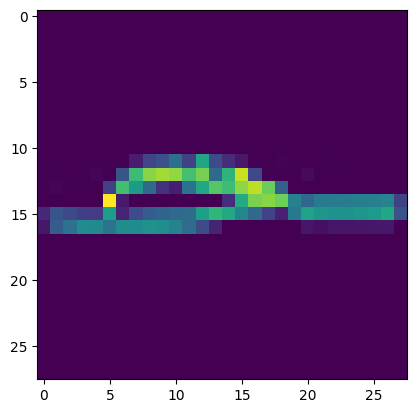

In [14]:
plt.imshow(test_image[8])

In [15]:
max_index = np.argmax(predictions)

class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
                'Shirt', 'Sneaker', 'Bag', 'Ankle-boot']
final_answer = class_labels[max_index]

print("The final answer is:", final_answer)


The final answer is: Sandal
